In [1]:
# %% [markdown]
# # 01 - MIDI基础探索
# 这个笔记本学习pretty_midi的基本使用方法

# %%
import pretty_midi
import numpy as np
import matplotlib.pyplot as plt
import os
from pprint import pprint

print("所有库导入成功！")

所有库导入成功！


In [2]:
# %% [markdown]
# ## 1. 加载第一个MIDI文件  这个.ipynb仅分析一首曲子 样本文件的第[7]个曲子

# %%
# 查看数据目录中的文件
data_dir = "data/sakamoto_samples"
if os.path.exists(data_dir):
    midi_files = [f for f in os.listdir(data_dir) if f.endswith('.mid')]
    print("找到的MIDI文件:", midi_files)#midi_files是列表，其元素类型字符串-表歌名
else:
    print("数据目录不存在，请先将MIDI文件放入 data/sakamoto_samples/ 文件夹")

# %%
# 加载第一个MIDI文件（如果有的话）
if midi_files:
    first_midi = os.path.join(data_dir, midi_files[7])#first_midi是字符串
    midi_data = pretty_midi.PrettyMIDI(first_midi) #该方法需要字符串参数，返回PrettyMIDI对象
    print(f"成功加载: {midi_files[7]}")
else:
    # 如果没有真实文件，我们创建一个示例（用于学习）
    print("使用示例MIDI数据进行演示")
    midi_data = pretty_midi.PrettyMIDI()
    # 创建一个简单的钢琴音符
    piano = pretty_midi.Instrument(program=0)  # 0 = 钢琴
    note = pretty_midi.Note(velocity=100, pitch=60, start=0, end=1)
    piano.notes.append(note)
    midi_data.instruments.append(piano)

# midi_data是后面分析的基本信息，他是一个PrettyMIDI对象，是[7]这首曲子

找到的MIDI文件: ['Always_with_you_Hisaishi.mid', 'Amore_Ryuichi.mid', 'Andata_Ryuichi.mid', 'Aqua_Ryuichi.mid', 'A_Summers_Day_Hisaishi.mid', 'Castle_in_the_Sky_Hisaishi.mid', 'Dancing_in_the_sky_Ryuichi.mid', 'Energy_Flow_Ryuichi.mid', 'Koko_Ryuichi.mid', 'MCMrL_Ryuichi.mid', 'My_Neighbor_Hisaishi.mid', 'Opus_Ryuichi.mid', 'Rain_Ryuichi.mid', 'roger_patanao_blue_things.mid', 'Summer_Hisaishi.mid', 'Thousand_Knives_Ryuichi.mid']
成功加载: Energy_Flow_Ryuichi.mid


In [3]:
# %% [markdown]
# ## 2. 查看MIDI文件基本信息

# %%
print("=== MIDI文件基本信息 ===")
print(f"文件总时长: {midi_data.get_end_time():.2f} 秒")
print(f"估计的BPM(速度): {midi_data.estimate_tempo():.1f}")
print(f"轨道数量: {len(midi_data.instruments)}")

# %% [markdown]
# ## 3. 分析轨道结构

# %%
print("\n=== 轨道分析 ===")
for i, instrument in enumerate(midi_data.instruments):
    print(f"\n轨道 {i}:")
    print(f"  乐器名称: {pretty_midi.program_to_instrument_name(instrument.program)}")
    print(f"  程序号: {instrument.program}")
    print(f"  音符数量: {len(instrument.notes)}")
    print(f"  是否是鼓: {instrument.is_drum}")

=== MIDI文件基本信息 ===
文件总时长: 236.97 秒
估计的BPM(速度): 167.4
轨道数量: 1

=== 轨道分析 ===

轨道 0:
  乐器名称: Acoustic Grand Piano
  程序号: 0
  音符数量: 1121
  是否是鼓: False


In [4]:
# %% [markdown]
# ## 3.1 多轨道合并分析

# %%
# 合并所有轨道的音符进行整体分析
print("\n=== 多轨道合并分析 ===")
all_notes = []
for instrument in midi_data.instruments:
    all_notes.extend(instrument.notes)

print(f"总音符数量: {len(all_notes)}")
print(f"音高范围: {min(note.pitch for note in all_notes)} - {max(note.pitch for note in all_notes)}")

# 计算合并后的基本统计
if all_notes:
    pitches = [note.pitch for note in all_notes]
    durations = [note.end - note.start for note in all_notes]
    velocities = [note.velocity for note in all_notes]
    
    print(f"平均音高: {np.mean(pitches):.1f}")
    print(f"平均时长: {np.mean(durations):.2f}秒")
    print(f"平均力度: {np.mean(velocities):.1f}")


=== 多轨道合并分析 ===
总音符数量: 1121
音高范围: 36 - 98
平均音高: 63.2
平均时长: 1.04秒
平均力度: 58.1


In [5]:
# %% [markdown]
# ## 4. 查看音符数据

# %%
if midi_data.instruments:
    first_instrument = midi_data.instruments[0]
    if first_instrument.notes:
        print("\n=== 前5个音符示例 ===")
        for i, note in enumerate(first_instrument.notes[:5]):
            print(f"音符 {i}: 音高={note.pitch}, 开始={note.start:.2f}s, 结束={note.end:.2f}s, 力度={note.velocity}")
        
        # 基本统计
        pitches = [note.pitch for note in first_instrument.notes]
        print(f"\n音高统计: 最小值={min(pitches)}, 最大值={max(pitches)}, 平均值={np.mean(pitches):.1f}")


=== 前5个音符示例 ===
音符 0: 音高=76, 开始=0.12s, 结束=1.15s, 力度=60
音符 1: 音高=69, 开始=1.16s, 结束=1.57s, 力度=44
音符 2: 音高=57, 开始=0.12s, 结束=1.57s, 力度=37
音符 3: 音高=64, 开始=0.83s, 结束=1.57s, 力度=41
音符 4: 音高=60, 开始=0.48s, 结束=1.57s, 力度=46

音高统计: 最小值=36, 最大值=98, 平均值=63.2


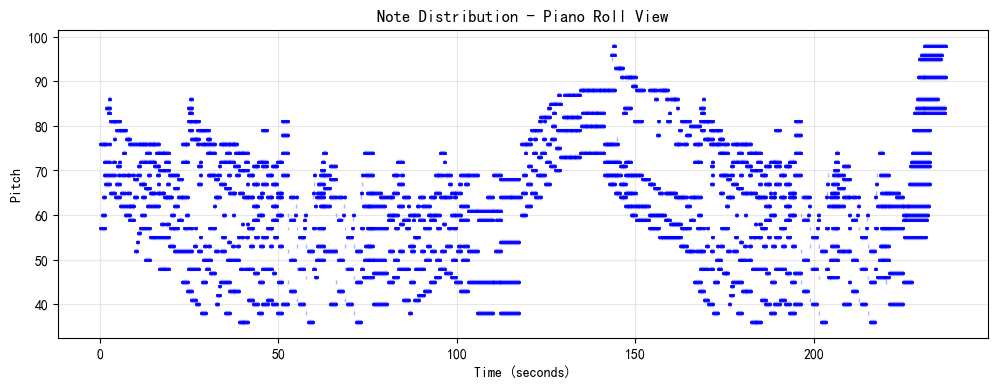

In [6]:
# %% [markdown]
# ## 5. 简单可视化

# %%
# 绘制音符时间分布图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 绘制音符时间分布图
if midi_data.instruments and midi_data.instruments[0].notes:
    notes = midi_data.instruments[0].notes
    plt.figure(figsize=(12, 4))
    
    # 创建钢琴卷帘视图
    for note in notes:
        plt.plot([note.start, note.end], [note.pitch, note.pitch], 
                color='blue', linewidth=2)
        plt.fill_between([note.start, note.end], note.pitch-0.4, note.pitch+0.4, 
                        alpha=0.3, color='blue')
    
    plt.xlabel('Time (seconds)')
    plt.ylabel('Pitch')  #音高
    plt.title('Note Distribution - Piano Roll View') #音符时间分布-钢琴卷帘视图
    plt.grid(True, alpha=0.3)
    plt.show()
#if midi_data.instruments and midi_data.instruments[0].notes:
#如果MIDI数据中有乐器轨道，并且第一个乐器轨道中有音符，就执行绘图代码。
#midi_data.instruments：检查是否存在乐器轨道
#midi_data.instruments[0].notes：检查第一个乐器轨道是否有音符   

In [7]:
# %% [markdown]
# ## 6. 保存探索结果

# %%
# 总结关键发现
print("\n=== 学习总结 ===")
print("1. MIDI文件包含多个轨道(instruments)，每个轨道代表一种乐器")
print("2. 每个轨道包含多个音符(notes)，每个音符有: 音高、开始时间、结束时间、力度")
print("3. 音高范围: 0-127，中央C=60")
print("4. 力度范围: 0-127，表示按键的强度")

# 保存基本信息到字典（供后续使用）
midi_info = {
    'duration': midi_data.get_end_time(),
    'tempo': midi_data.estimate_tempo(),
    'num_instruments': len(midi_data.instruments),
    'total_notes': sum(len(instr.notes) for instr in midi_data.instruments)
}

print(f"\nMIDI信息摘要: {midi_info}")


=== 学习总结 ===
1. MIDI文件包含多个轨道(instruments)，每个轨道代表一种乐器
2. 每个轨道包含多个音符(notes)，每个音符有: 音高、开始时间、结束时间、力度
3. 音高范围: 0-127，中央C=60
4. 力度范围: 0-127，表示按键的强度

MIDI信息摘要: {'duration': np.float64(236.96875), 'tempo': np.float64(167.41352709898956), 'num_instruments': 1, 'total_notes': 1121}
